# Data Transformation

In [2]:
import pandas as pd

# Dataset load
df = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult.csv")

# Q1. Replace missing values ("?") in 'workclass' and 'occupation'
df["workclass"] = df["workclass"].replace("?", "Unknown")
df["occupation"] = df["occupation"].replace("?", "Unknown")

# Q2. Remove extra spaces in categorical values
df["workclass"] = df["workclass"].str.strip()
df["occupation"] = df["occupation"].str.strip()
df["education"] = df["education"].str.strip()

# Q3. Rename columns to readable names
df = df.rename(columns={
    "educational-num": "Education_Level_Num",
    "fnlwgt": "Sampling_Weight",
    "hours-per-week": "Hours_Per_Week"
})

# Q4. Drop 'Sampling_Weight' column if not needed
df = df.drop(columns=["Sampling_Weight"])

# Final cleaned dataset preview
print(df.head())


   age  workclass     education  Education_Level_Num      marital-status  \
0   25    Private          11th                    7       Never-married   
1   38    Private       HS-grad                    9  Married-civ-spouse   
2   28  Local-gov    Assoc-acdm                   12  Married-civ-spouse   
3   44    Private  Some-college                   10  Married-civ-spouse   
4   18    Unknown  Some-college                   10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4            Unknown    Own-child  White  Female             0             0   

   Hours_Per_Week native-country income  
0              40  U

In [3]:
import pandas as pd

# Dataset load
df = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult.csv")

# Q5. Convert numeric columns to correct data types
numeric_cols = ["age", "hours-per-week", "capital-gain", "capital-loss", "educational-num"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Convert categorical columns to 'category' type
categorical_cols = ["income", "race", "workclass", "education", "occupation"]
df[categorical_cols] = df[categorical_cols].astype("category")

#  Q6. Convert income column into binary (0 = <=50K, 1 = >50K)
df["income_binary"] = df["income"].apply(lambda x: 0 if x.strip() == "<=50K" else 1)

# Check data types after corrections
print(df.dtypes.head(10))

# Preview
print(df[["income", "income_binary"]].head())


age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status       object
occupation         category
relationship         object
race               category
gender               object
dtype: object
  income income_binary
0  <=50K             0
1  <=50K             0
2   >50K             1
3   >50K             1
4  <=50K             0


In [4]:
# Q7. Group education levels
low = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]
medium = ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]
high = ["Bachelors", "Masters", "Doctorate", "Prof-school"]

def map_education(x):
    if x in low: return "Low"
    elif x in medium: return "Medium"
    elif x in high: return "High"
    else: return "Other"

df["education_group"] = df["education"].apply(map_education)

# Q8. Age groups
df["age_group"] = pd.cut(df["age"], 
                         bins=[0, 30, 50, 100], 
                         labels=["Young", "Middle", "Senior"])

# Q9. Capital Gain flag
df["has_capital_gain"] = df["capital-gain"].apply(lambda x: "Yes" if x > 0 else "No")

# Q10. Work Hours category
def work_hours_category(x):
    if x < 35: return "Part-time"
    elif 35 <= x <= 50: return "Full-time"
    else: return "Overtime"

df["work_hours_category"] = df["hours-per-week"].apply(work_hours_category)

# Q11. Simplify marital status
df["marital_status_simple"] = df["marital-status"].apply(
    lambda x: "Married" if "Married" in x else "Not Married"
)

# Q12. Group rare native-country values
country_counts = df["native-country"].value_counts()
rare_countries = country_counts[country_counts < 100].index  # less than 100 occurrences
df["native-country-grouped"] = df["native-country"].replace(rare_countries, "Other")

# Preview final engineered dataset
print(df[["education", "education_group", "age", "age_group", "capital-gain", "has_capital_gain", "hours-per-week", "work_hours_category", "marital-status", "marital_status_simple", "native-country", "native-country-grouped"]].head())


      education education_group  age age_group  capital-gain has_capital_gain  \
0          11th             Low   25     Young             0               No   
1       HS-grad          Medium   38    Middle             0               No   
2    Assoc-acdm          Medium   28     Young             0               No   
3  Some-college          Medium   44    Middle          7688              Yes   
4  Some-college          Medium   18     Young             0               No   

   hours-per-week work_hours_category      marital-status  \
0              40           Full-time       Never-married   
1              50           Full-time  Married-civ-spouse   
2              40           Full-time  Married-civ-spouse   
3              40           Full-time  Married-civ-spouse   
4              30           Part-time       Never-married   

  marital_status_simple native-country native-country-grouped  
0           Not Married  United-States          United-States  
1               Ma

In [5]:
# Unpivot capital-gain and capital-loss
df_q14 = df.melt(
    id_vars=["age", "workclass", "educational-num", "income"],
    value_vars=["capital-gain", "capital-loss"],
    var_name="Capital_Type",
    value_name="Capital_Amount"
)

print(df_q14.head(10))


   age         workclass  educational-num income  Capital_Type  Capital_Amount
0   25           Private                7  <=50K  capital-gain               0
1   38           Private                9  <=50K  capital-gain               0
2   28         Local-gov               12   >50K  capital-gain               0
3   44           Private               10   >50K  capital-gain            7688
4   18                 ?               10  <=50K  capital-gain               0
5   34           Private                6  <=50K  capital-gain               0
6   29                 ?                9  <=50K  capital-gain               0
7   63  Self-emp-not-inc               15   >50K  capital-gain            3103
8   24           Private               10  <=50K  capital-gain               0
9   55           Private                4  <=50K  capital-gain               0


In [6]:
import pandas as pd

# ----------------------------
# Load dataset
# ----------------------------
df = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult.csv")
if "education" in df.columns:
    df = df.drop(columns=["education"])
print("Columns after Q13:\n", df.columns)

if "capital-gain" in df.columns and "capital-loss" in df.columns:
    df_melted = df.melt(
        id_vars=["age", "workclass", "educational-num", "income"],
        value_vars=["capital-gain", "capital-loss"],
        var_name="Capital_Type",
        value_name="Capital_Amount"
    )
    print("\nUnpivoted Data (Q14):")
    print(df_melted.head(10))

try:
    df_train = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult_train.csv")
    df_test = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult_test.csv")

    # Append = combine rows
    df_combined = pd.concat([df_train, df_test], ignore_index=True)
    print("\nCombined Dataset Shape (Q15):", df_combined.shape)

except FileNotFoundError:
    print("\nNo train/test files found → skipping Q15 merge example.")


Columns after Q13:
 Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

Unpivoted Data (Q14):
   age         workclass  educational-num income  Capital_Type  Capital_Amount
0   25           Private                7  <=50K  capital-gain               0
1   38           Private                9  <=50K  capital-gain               0
2   28         Local-gov               12   >50K  capital-gain               0
3   44           Private               10   >50K  capital-gain            7688
4   18                 ?               10  <=50K  capital-gain               0
5   34           Private                6  <=50K  capital-gain               0
6   29                 ?                9  <=50K  capital-gain               0
7   63  Self-emp-not-inc               15   >50K  capital-gain            3103
8   24   

# Data Visualization

Age_Bins
0-9          0
10-19     3623
20-29    12170
30-39    12838
40-49    10403
50-59     6202
60-69     2738
70-79      720
80-89      148
Name: count, dtype: int64


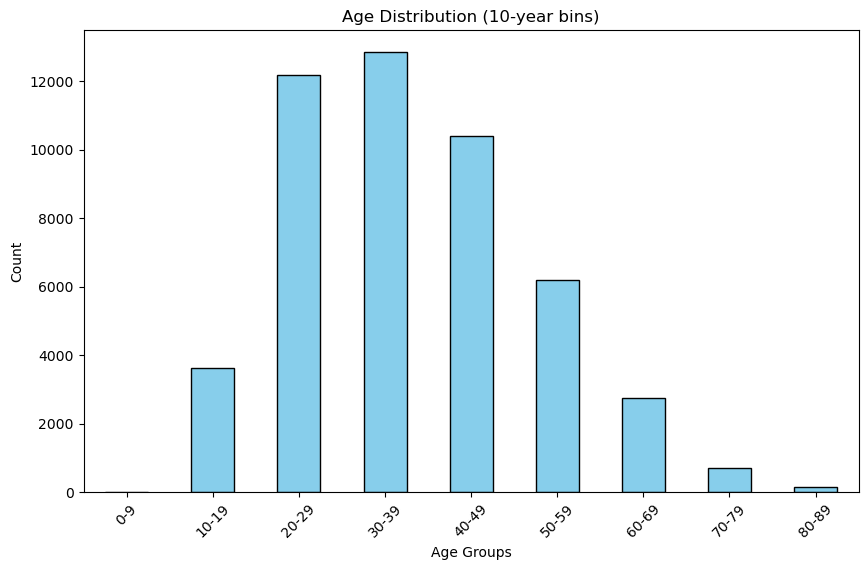

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (replace with your own CSV)
df = pd.read_csv("C:\\Users\\Gateway\\Downloads\\adult.csv")   

# Create 10-year bins
bins = range(0, df['age'].max() + 10, 10)   # 0–9, 10–19, ...
labels = [f"{i}-{i+9}" for i in bins[:-1]]

df['Age_Bins'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Show frequency table
print(df['Age_Bins'].value_counts().sort_index())

# Plot histogram (using the bins)
plt.figure(figsize=(10,6))
df['Age_Bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Age Distribution (10-year bins)")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()